In [ ]:
#PROYECTO FINAL TRATAMIENTO DE DATOS

##Francisco Salazar H.

In [4]:
import tensorflow as tf
import os

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
tf.config.list_physical_devices('GPU')

[]

In [31]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [32]:
data_dir = 'Data/Entrenamiento' 

In [34]:
img = cv2.imread(os.path.join(data_dir,'CLASS_02', '05-CAPTURE_20220421_053226_860.png' ))

In [35]:
img.shape

(216, 384, 3)

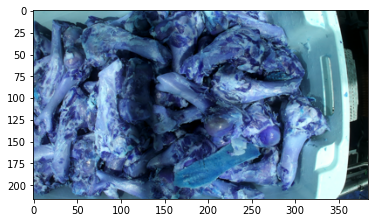

In [36]:
plt.imshow(img)

In [37]:
#Load Data

In [38]:
import numpy as np
from matplotlib import pyplot as plt

In [39]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)


Found 1632 files belonging to 8 classes.


In [41]:
data_iterator = data.as_numpy_iterator()

In [42]:
batch = data_iterator.next()

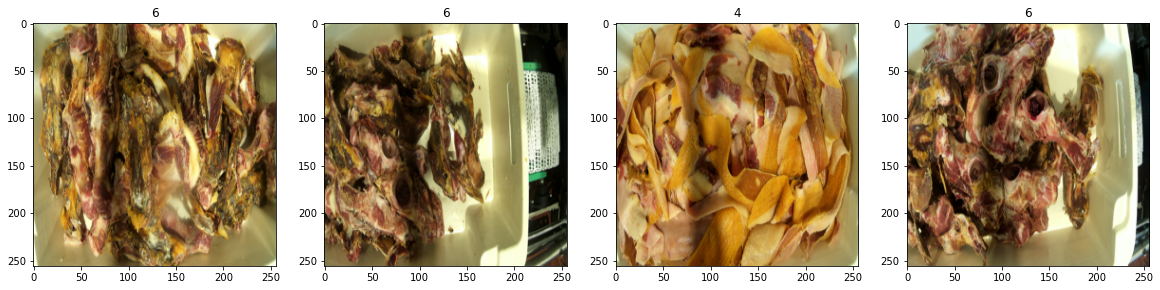

In [43]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [44]:
#Scale Data

In [147]:
data = data.map(lambda x,y: (x/255, y))

In [47]:
#Split Data

In [152]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [153]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [154]:
#Build a Deep Learning Model

In [155]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [156]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [157]:
model = Sequential()

In [158]:
model.add(Conv2D(32, (3,3), padding ="same", activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

In [159]:
model.compile(loss='categorical_crossentropy',
            metrics=['accuracy'])

In [160]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 126, 126, 64)      18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 254016)            0         
                                                                 
 dense_16 (Dense)            (None, 256)              

In [161]:
#Train

In [162]:
logdir='logs'

In [163]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [164]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [165]:
hist = model.fit(train, steps_per_epoch=250 ,epochs=20, validation_data=val)

Epoch 1/20


ValueError: in user code:

    File "C:\Users\franc\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\franc\anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\franc\anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\franc\anaconda3\lib\site-packages\keras\engine\training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\franc\anaconda3\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "C:\Users\franc\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\franc\anaconda3\lib\site-packages\keras\losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\franc\anaconda3\lib\site-packages\keras\losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\franc\anaconda3\lib\site-packages\keras\losses.py", line 1787, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\franc\anaconda3\lib\site-packages\keras\backend.py", line 5119, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 8) are incompatible


In [62]:
#Plot Performance

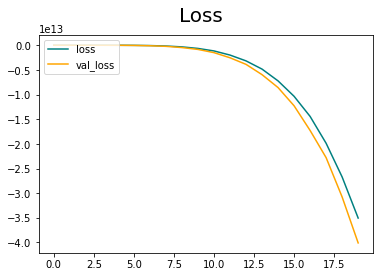

In [63]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

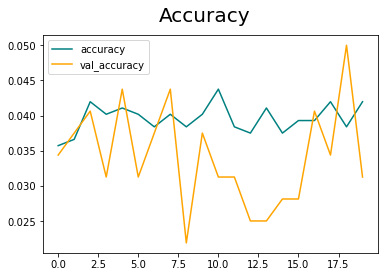

In [64]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [65]:
#Evaluate

In [66]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [67]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [68]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 112ms/step


In [69]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.0375, shape=(), dtype=float32)


In [70]:
#Test

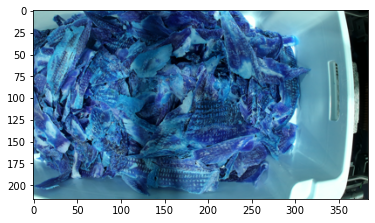

In [77]:
img = cv2.imread('clase3.png')
plt.imshow(img)
plt.show()

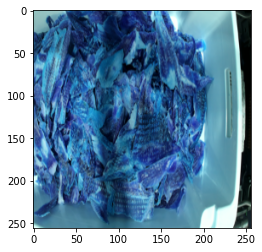

In [78]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [79]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 19ms/step


In [80]:
yhat

array([[1.]], dtype=float32)

In [81]:
    if yhat == 0:
        print("pred: 1")
    elif yhat == 1:
        print("pred: 2")
    elif yhat == 2:
        print("pred: 3")
    elif yhat == 3:
        print("pred: 4")
    elif yhat == 4:
        print("pred: 5")
    elif yhat == 5:
        print("pred: 6")
    elif yhat == 6:
        print("pred: 7")
    elif yhat == 7:
        print("pred: 8")

pred: 2
